In [19]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from windrose import WindroseAxes
import matplotlib.cm as cm
import plotly.express as px
import math
import os, importlib, sys

sys.path.insert(0, '../../code/src')
importlib.reload(sys.modules['pmf_result'])
from pmf_result import pmf_output_to_df
from pmf_result import plot_pmf_profile
from pmf_result import plot_factor_time_series
from pmf_result import reorder_factor

In [87]:
factor_name = ['Composting(MeOH)', 'Biogenic', 'Gasoline vapor-summer blend',
               'Gasoline vapor-winter vapor', 'Secondary VOC + halogenated VOC',
               'University + k12 institutes', 'Anthoropogenic solvents', 
               'VCP(siloxane)','VCP(ethanol)']

In [153]:
profile_conc, profile_perc_spec, profile_perc_factor, contribution = \
    pmf_output_to_df(43,9,'../../data/intermediate/PMF_output/Factor9')
new_order = ['Factor 7','Factor 1','Factor 4','Factor 9','Factor 6','Factor 5','Factor 2',
             'Factor 8','Factor 3']
#new_order = ['Factor 1','Factor 5','Factor 2','Factor 8','Factor 4','Factor 3','Factor 7',
#             'Factor 6','Factor 9']
profile_perc_spec = reorder_factor(profile_perc_spec, new_order)
profile_conc = reorder_factor(profile_conc, new_order)
contribution = reorder_factor(contribution, new_order)

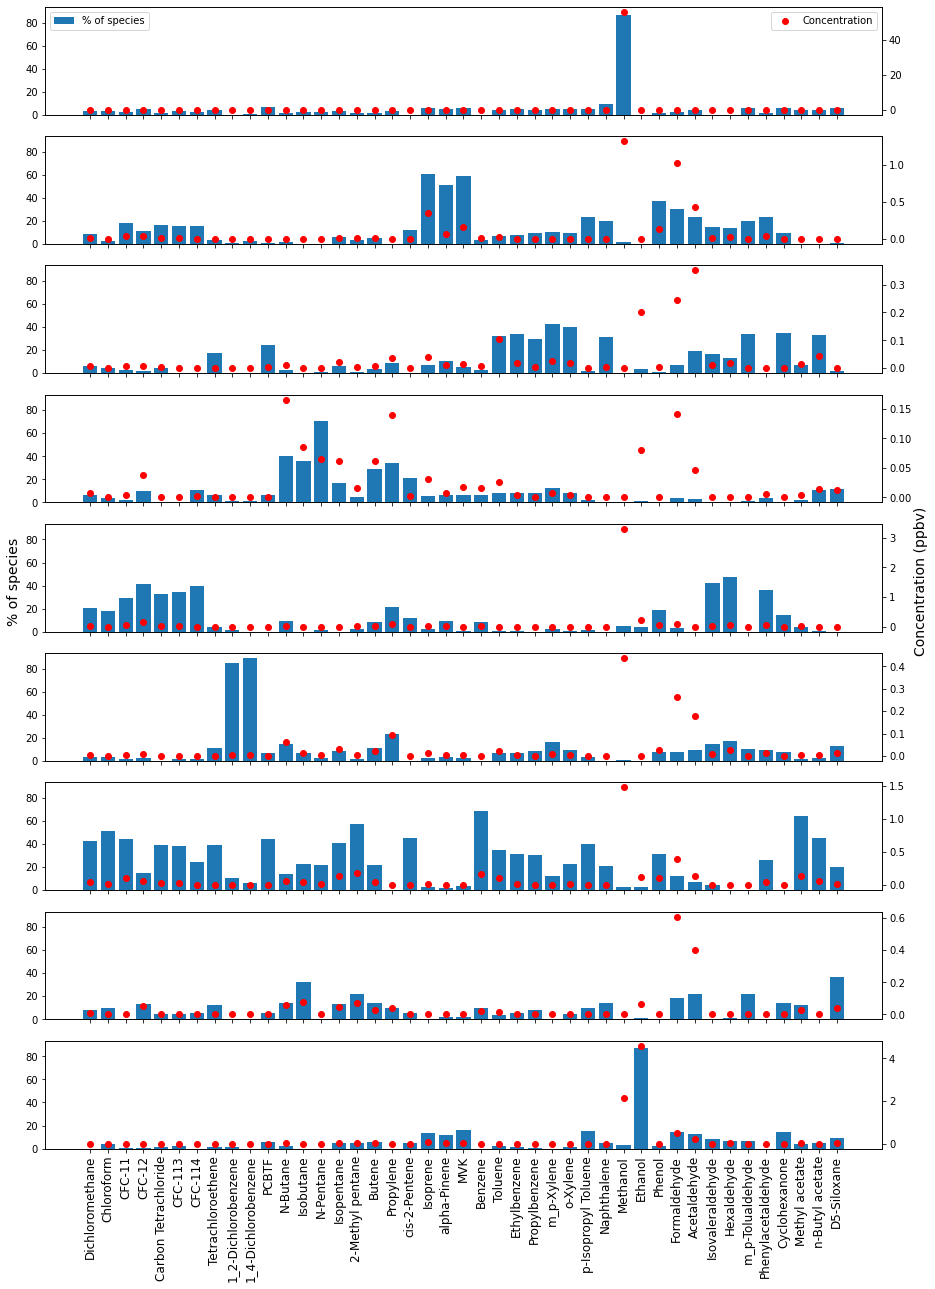

In [154]:
fig = plot_pmf_profile(43,9,profile_perc_spec,profile_conc)

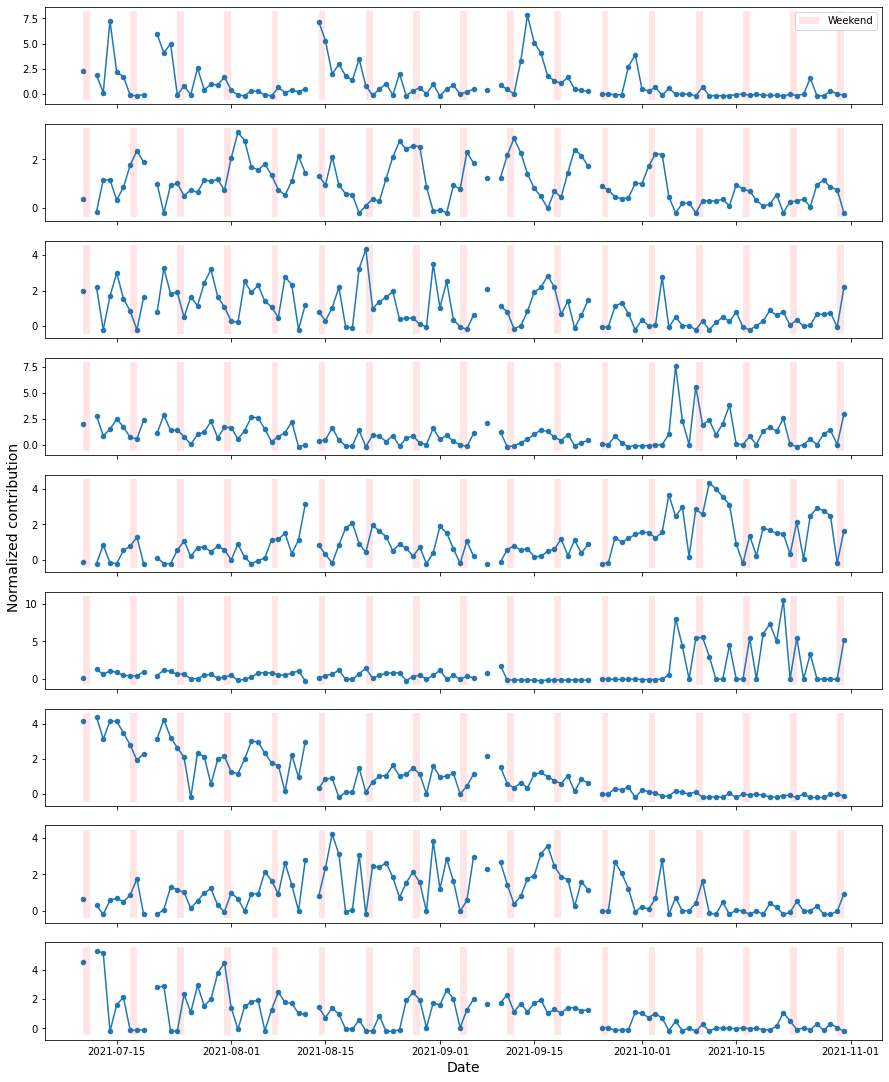

In [90]:
fig = plot_factor_time_series(43,9,contribution)

Calculate MIR or VOCR of PMF-solved factors

In [156]:
profile_conc.columns = ['Parameter'] + factor_name

In [157]:
# replace alpha-pinene by TERP concentration used in box model
index_alpha_pinene = profile_conc[profile_conc['Parameter']=='alpha-Pinene'].index[0]
profile_conc.iloc[index_alpha_pinene,1:10] = \
    profile_conc.iloc[index_alpha_pinene,1:10]/0.112459

In [159]:
df_reactivity=pd.read_csv('../../data/raw/VOC_reactivity_MIR_redlands.csv')
df_reactivity['Parameter'] = df_reactivity['Parameter'].str.replace(',','_')
df_reactivity.loc[df_reactivity['Parameter'].str.contains('Decamethylcyclopentasiloxane'),'Parameter'] = 'D5-Siloxane'
df_reactivity = df_reactivity.replace('Trichlorofluoromethane','CFC-11')
df_reactivity = df_reactivity.replace('Dichlorodifluoromethane','CFC-12')
df_reactivity = df_reactivity.replace('1_1_2-Trichlorotrifluoroethane','CFC-113')
df_reactivity = df_reactivity.replace('1_2-Dichloro-1_1_2_2-tetrafluoroethane','CFC-114')


# get MIR list
df_MIR = profile_conc.merge(df_reactivity[['Parameter','MW','MIR']], 
                            on='Parameter', how='left')[['Parameter','MW','MIR']]
# get OH reactivity list
df_OH_reactivity = df_reactivity[['Parameter','MW','A','B','E/R(K-1)','Ea(J/mol)','k(T)','T']]

In [160]:
profile_MIR = profile_conc.merge(df_MIR, on='Parameter', how='left')

In [165]:
# calculate MIR for each factor
for i in profile_MIR.columns[1:10]:
    column_name = 'MIR_' + i
    profile_MIR[column_name] = profile_MIR[i]*profile_MIR['MW']*profile_MIR['MIR']/48

PMF_factor_MIR = profile_MIR.iloc[0:42,12:]
PMF_factor_MIR.sum(axis=0)   #.loc[0:40,profile_MIR.columns.str.contains('MIR')].sum(axis=0)

MIR_Composting(MeOH)                   27.183352
MIR_Biogenic                           19.677469
MIR_Gasoline vapor-summer blend         8.342505
MIR_Gasoline vapor-winter vapor         4.935116
MIR_Secondary VOC + halogenated VOC     6.730856
MIR_University + k12 institutes         5.665647
MIR_Anthoropogenic solvents             8.391120
MIR_VCP(siloxane)                       7.603830
MIR_VCP(ethanol)                       14.298734
dtype: float64